# <center>UNDERSTANDING STUDENT DROPOUT </center>

Welcome to the student dropout analysis! In this Jupyter notebook, we will center on analyzing, cleaning and preparing a dataset regarding information about students dropout in a university and their academic and financial behavior over several semesters. 

Student dropout is when a student leaves their studies before completing their academic program. The reasons can vary, from financial problems to academic or personal difficulties. It is important to highlight that student dropout not only affects the student who leaves their studies, but it can also have an impact on the university community as a whole.

To tackle this issue, I obtained a dataset from an anonymous university and i will analyse it using the CRISP-DM Process.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# Loading the dataset
university_data = pd.read_csv(r'../Data/university_data.csv')

In [3]:
print("The dataset has the following dimensions: ",university_data.shape)
print("Below are some descriptions of the variables: ")

The dataset has the following dimensions:  (61480, 64)
Below are some descriptions of the variables: 


Among the available information, we have:

- **student_id:** A unique identifier assigned to each student.
- **period:** The academic period during which the data was collected, usually identified by a year and a semester (e.g., "2015-1" refers to the first semester of 2015).
- **student_type:** The type of student, which can be "INGRESANTE" (new student), "REGULAR" (continuing student), "REINGRESO" (returning student)
- **enrolled_credits:** The number of credits that the student is currently enrolled in.
- **enrolled_courses:** The number of courses that the student is currently enrolled in.
- **enrollment_days:** days elapsed between enrollment and the start of classes
- **scholarship_percentage:** The percentage of the student's tuition that is covered by a scholarship, if applicable.
- **cycle:** The academic cycle in which the student is currently enrolled.
- **previous_cycle_scholarship_percentage:** The percentage of the student's tuition that was covered by a scholarship in the previous cycle, if applicable.
- **previous_cycle_avg_grade:** The student's average grade in the previous cycle, if applicable.
- **previous_cycle_student_admission:** Flag indicating whether the student was admitted in the previous cycle.
- **cumulative_avg_grade:** The student's cumulative average grade across all cycles.
- **cumulative_courses_failed:** The number of courses that the student has failed across all cycles.
- **cumulative_enrolled_credits:** The total number of credits that the student has enrolled in across all cycles.
- **cumulative_approved_credits:** The total number of credits that the student has successfully completed across all cycles.
- **enrolled_academic_periods:** The total number of academic periods in which the student has been enrolled.
- **total_withdrawals_period:** Number of times the student has withdrawn from an academic period.
- **total_dropouts:** The total number of dropouts the student has had historically.
- **average_grade:** The student's average grade for the current period.
- **failed_courses:** The number of courses that the student has failed during the current period.
- **approved_credits:** The number of credits that the student has successfully completed during the current period.
- **dropout_flag:** A binary variable indicating whether the student has dropped out in the semester.
- **status:** Final status of the student's enrollment for the semester.
- **due_date_installment1-5:** The due dates for each installment of the student's tuition payments.
- **installment1-5_amount:** The amount due for each installment of the student's tuition payments.
- **installment1-5_payment_date:** The date on which the student made each installment payment.
- **installment1-5_paid_amount:** The amount that the student paid for each installment of their tuition payments.
- **next_term_date:** The date on which the next academic term begins.
- **period_end_date:** The date on which the current academic period ends.

In [4]:
# Formatting the correct data type for the date columns
university_data['tuition_fee_payment_date1'] = pd.to_datetime(university_data.tuition_fee_payment_date1)
university_data['tuition_fee_payment_date2'] = pd.to_datetime(university_data.tuition_fee_payment_date2)
university_data['tuition_fee_payment_date3'] = pd.to_datetime(university_data.tuition_fee_payment_date3)
university_data['tuition_fee_payment_date4'] = pd.to_datetime(university_data.tuition_fee_payment_date4)
university_data['tuition_fee_payment_date5'] = pd.to_datetime(university_data.tuition_fee_payment_date5)
university_data['tuition_fee_due_date1'] = pd.to_datetime(university_data.tuition_fee_due_date1)
university_data['tuition_fee_due_date2'] = pd.to_datetime(university_data.tuition_fee_due_date2)
university_data['tuition_fee_due_date3'] = pd.to_datetime(university_data.tuition_fee_due_date3)
university_data['tuition_fee_due_date4'] = pd.to_datetime(university_data.tuition_fee_due_date4)
university_data['tuition_fee_due_date5'] = pd.to_datetime(university_data.tuition_fee_due_date5)
university_data['period_end_date'] = pd.to_datetime(university_data.period_end_date)

Let's inspect the data and look at some statistics.

In [5]:
university_data.describe()

,enrolled_credits,enrolled_courses,enrollment_days,scholarship_percentage,cycle,previous_cycle_scholarship_percentage,previous_cycle_avg_grade,previous_cycle_student_admission,formal_withdrawal_previous_cycle,cumulative_avg_grade,cumulative_courses_failed,cumulative_enrolled_credits,cumulative_approved_credits,enrolled_academic_periods,total_withdrawals_period,total_dropouts,previous_cycle_failed_courses_ratio,works,withdrawn_courses,number_of_absences,number_of_scheduled_classes,attendance_percentage,formal_withdrawal,average_grade,failed_courses,approved_credits,dropout,dropout_flag,tuition_fee_amount1,tuition_fee_amount2,tuition_fee_amount3,tuition_fee_amount4,tuition_fee_amount5,tuition_fee_paid_amount1,tuition_fee_paid_amount2,tuition_fee_paid_amount3,tuition_fee_paid_amount4,tuition_fee_paid_amount5,payment1,payment2,payment3,payment4,payment5,full_payment1,full_payment2,full_payment3,full_payment4,full_payment5
count,61480.000000,61480.000000,61480.000000,61480.000000,61480.000000,51078.000000,43863.000000,51078.000000,51078.000000,51078.000000,50978.000000,50978.000000,50978.000000,61480.000000,50871.000000,50871.000000,50978.000000,61480.000000,61480.000000,61229.000000,61229.000000,61229.000000,61480.000000,59526.000000,59598.000000,59598.000000,61480.000000,61480.000000,60641.000000,61099.000000,60118.000000,58653.000000,57919.000000,60641.000000,61099.000000,60118.000000,58653.000000,57919.000000,61480.000000,61480.000000,61480.000000,61480.000000,61480.000000,61480.000000,61480.000000,61480.000000,61480.000000,61480.000000
mean,20.564086,4.367957,4.557872,9.535920,4.429798,7.688374,14.737170,0.118740,0.009202,14.561470,4.527581,103.570089,82.212641,4.586223,0.059209,0.317332,0.206964,0.779652,0.576187,6.589459,45.044048,0.855221,0.030612,14.035320,0.635760,15.409460,0.009466,0.241851,1258.180572,907.747896,912.953533,911.860119,907.405544,1236.561216,872.901183,862.984468,849.790057,835.167451,0.974317,0.849138,0.666119,0.604099,0.423227,0.958263,0.848536,0.665940,0.603692,0.422658
std,6.011223,1.161149,7.475571,16.615465,3.018001,15.465250,2.338455,0.323485,0.095484,1.804741,4.395430,60.285884,50.263280,2.906803,0.272437,0.631807,0.176957,0.414485,1.019907,7.385266,14.634068,0.153567,0.172264,3.389417,1.060474,7.691779,0.096835,0.428208,288.929146,303.931849,250.526830,242.496264,248.263377,261.122652,346.060933,317.895121,326.163420,339.404544,0.158190,0.357917,0.471602,0.489047,0.494075,0.199990,0.358503,0.471665,0.489134,0.493986
min,0.000000,1.000000,-135.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.750000,0.010000,-236.750000,0.000000,0.000000,0.000000,0.000000,-236.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4.000000,3.000000,0.000000,2.000000,0.000000,14.000000,0.000000,0.000000,13.810000,1.000000,51.000000,40.000000,2.000000,0.000000,0.000000,0.070000,1.000000,0.000000,2.000000,35.000000,0.810000,0.000000,13.500000,0.000000,10.000000,0.000000,0.000000,1194.000000,856.020000,896.000000,896.000000,896.000000,1124.000000,771.750000,771.750000,771.750000,771.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,22.000000,5.000000,4.000000,0.000000,4.000000,0.000000,15.060000,0.000000,0.000000,14.760000,3.000000,96.000000,75.000000,4.000000,0.000000,0.000000,0.180000,1.000000,0.000000,4.000000,44.000000,0.900000,0.000000,15.000000,0.000000,15.000000,0.000000,0.000000,1275.000000,970.000000,970.000000,970.000000,970.000000,1275.000000,970.000000,970.000000,970.000000,970.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,25.000000,5.000000,7.000000,20.000000,7.000000,10.000000,16.000000,0.000000,0.000000,15.650000,7.000000,148.000000,120.000000

- The average number of credits enrolled per student is 20.57, with a minimum of 6 credits and a maximum of 36 credits.
- The average number of courses enrolled per student is 4.37, with a minimum of 1 courses and a maximum of 8 courses.
- The number of days elapsed between enrollment and the start of classes is 4.55, although we can find maximum values of up to 17 and minimum values of up to -135, which would indicate that the student enrolled well after the start of classes. Perhaps this requires further analysis.
- The average grade obtained by students in the previous cycle is 14.73.
- The average cumulative grade of students is 14.55.
- The average attendance percentage of students is 83.56%, however, we found negative values that do not reflect the expected behavior.

Let's determine the percentage of missing values in the data

In [6]:
nulls = (university_data.isnull().sum()/university_data.shape[0])#.reset_index()
nulls = pd.DataFrame(nulls[nulls > 0 ].reset_index()).rename(columns = {"index": "variable",0:"nulls_pct"})

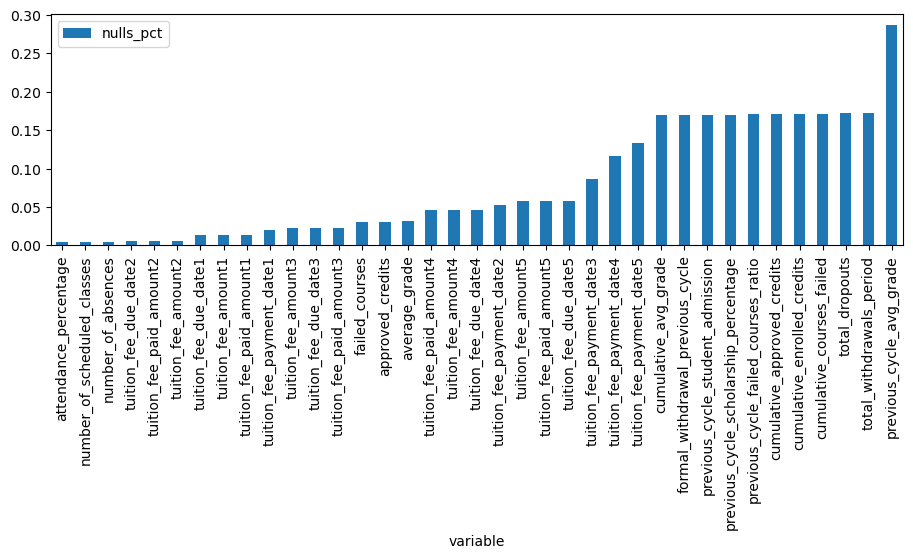

In [7]:
nulls.sort_values('nulls_pct').plot.bar(x='variable', y='nulls_pct', rot=90,figsize=(11, 3))
plt.show()

It can be observed that several variables have a significant percentage of missing values, exceeding in some cases 20%. Some of these variables pertain to cumulative and historical information, it would be interesting to delve into the analysis to identify the reason behind these missing values.

## PREPARING THE DATASET

### HANDLE MISSING DATA

Firstly, we will divide the variables into two categories, academic and financial, and we will devise different strategies to handle missing values for each category.
####  ACADEMIC GROUP
We will now work with null values and will impute the following list of academic variables.  
<br>
<center>['previous_cycle_scholarship_percentage','previous_cycle_avg_grade','previous_cycle_student_admission',
'formal_withdrawal_previous_cycle','cumulative_avg_grade','cumulative_courses_failed','cumulative_enrolled_credits',
 'cumulative_approved_credits','total_withdrawals_period','total_dropouts','previous_cycle_failed_courses_ratio',
 'attendance_percentage','average_grade','failed_courses','approved_credits']</center>
<br>
The academic variables with null values are mostly related to cumulative or historical information from previous cycles. At first glance, it seems that this missing information can be linked to student who didn't study in the previous semester or students who are new to the university, let's validate this statement.

In [8]:
academic_null_cols = ['previous_cycle_scholarship_percentage','previous_cycle_avg_grade','previous_cycle_student_admission',
 'formal_withdrawal_previous_cycle','cumulative_avg_grade','cumulative_courses_failed','cumulative_enrolled_credits',
 'cumulative_approved_credits','total_withdrawals_period','total_dropouts','previous_cycle_failed_courses_ratio',
 'attendance_percentage','average_grade','failed_courses','approved_credits']

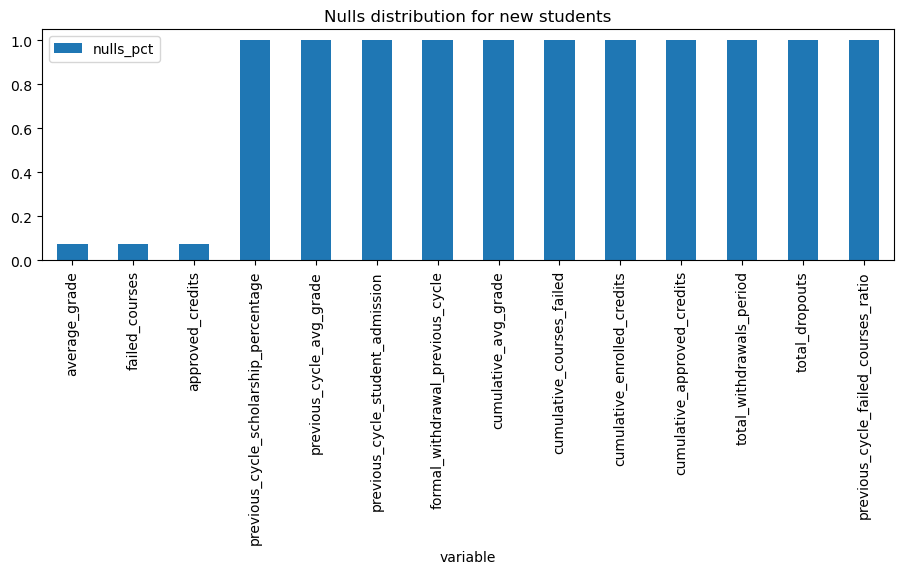

In [9]:
new_students = university_data[university_data.student_type.isin(['new'])][academic_null_cols]
nulls = (new_students.isnull().sum()/new_students.shape[0])#.reset_index()
nulls = pd.DataFrame(nulls[nulls > 0 ].reset_index()).rename(columns = {"index": "variable",0:"nulls_pct"})
nulls.sort_values('nulls_pct').plot.bar(x='variable', y='nulls_pct', rot=90,figsize=(11, 3))
plt.title('Nulls distribution for new students')
plt.show()

From the chart above, we can validate that historical information is entirely null for the entire population of new students. 

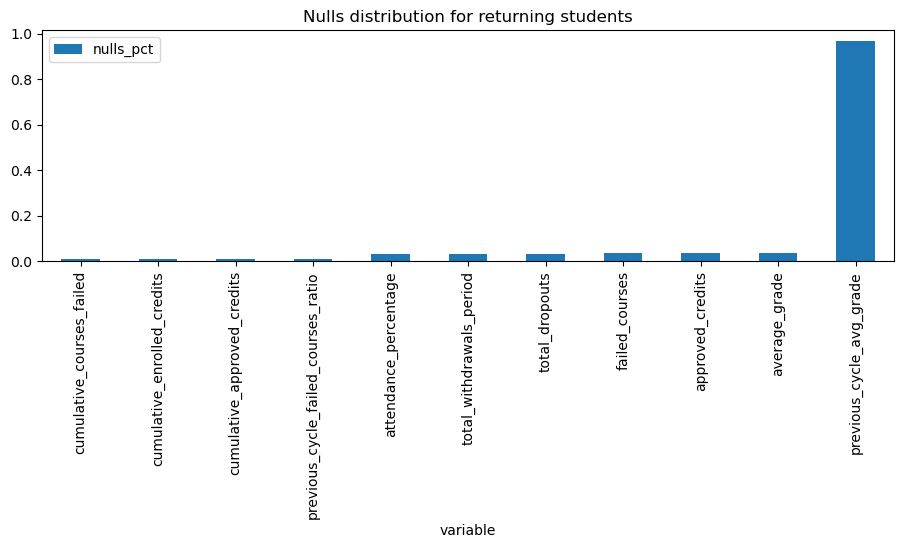

In [10]:
returning_students = university_data[university_data.student_type.isin(['returning'])][academic_null_cols]
nulls = (returning_students.isnull().sum()/returning_students.shape[0])#.reset_index()
nulls = pd.DataFrame(nulls[nulls > 0 ].reset_index()).rename(columns = {"index": "variable",0:"nulls_pct"})
nulls.sort_values('nulls_pct').plot.bar(x='variable', y='nulls_pct', rot=90,figsize=(11, 3))
plt.title('Nulls distribution for returning students')
plt.show()

Similarly to the case of new students, we can expect that returning students do not have information from the previous cycle, which is evident in one of the variables with the highest percentage of missing values.

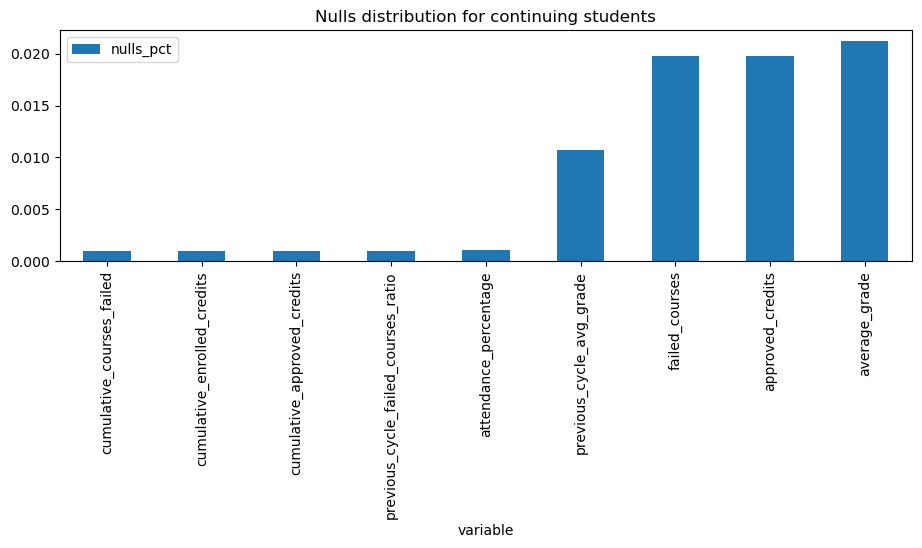

In [11]:
continuing_students = university_data[university_data.student_type.isin(['continuing'])][academic_null_cols]
nulls = (continuing_students.isnull().sum()/continuing_students.shape[0])#.reset_index()
nulls = pd.DataFrame(nulls[nulls > 0 ].reset_index()).rename(columns = {"index": "variable",0:"nulls_pct"})
nulls.sort_values('nulls_pct').plot.bar(x='variable', y='nulls_pct', rot=90,figsize=(11, 3))
plt.title('Nulls distribution for continuing students')
plt.show()

The missing values ratio for returning students is similar to that of returning students.

#### - Imputting

For this academic group variables, we will replace them with either 0 or mean. For instance, for historical variables with entirely null values for the new student population, assigning a value of 0 is appropriate since no data is available. As for variables like average grade or passed courses, we will use mean and 0 to replace null values, as they may be due to input errors or a business rule

**Business Rule Example:** During the academic period of the university, a student may formally withdraw, and when this happens, the student's enrollment is invalidated, and their information becomes null, we will complete the information with 0 for these cases.

In other cases, we will complete the null values with the mean, which could be a result of data input errors among other factors.

In [12]:
fill_0 = lambda col:col.fillna(0)
fill_mean = lambda col:col.fillna(col.mean())
def fill_withdrawal_null(df,cols):
    for col in cols:
        df.loc[(df.formal_withdrawal == 1) & (df[col].isnull()),col] = 0
        df[[col]] = df[[col]].apply(fill_mean, axis=0)
    return df

In [13]:
university_data[academic_null_cols[:-3]] = university_data[academic_null_cols[:-3]].apply(fill_0, axis=0)
university_data = fill_withdrawal_null(university_data,academic_null_cols[-3:])

####  FINANCIAL GROUP

We have the following list of financial variables.  
<br>
<center>['tuition_fee_due_date1', 'tuition_fee_due_date2','tuition_fee_due_date3', 'tuition_fee_due_date4',
    'tuition_fee_due_date5', 'tuition_fee_amount1', 'tuition_fee_amount2','tuition_fee_amount3', 'tuition_fee_amount4', 
    'tuition_fee_amount5','tuition_fee_payment_date1', 'tuition_fee_payment_date2','tuition_fee_payment_date3', 
    'tuition_fee_payment_date4','tuition_fee_payment_date5', 'tuition_fee_paid_amount1','tuition_fee_paid_amount2', 
    'tuition_fee_paid_amount3','tuition_fee_paid_amount4', 'tuition_fee_paid_amount5']</center>
<br>

In [14]:
financial_null_cols = ['tuition_fee_due_date1', 'tuition_fee_due_date2','tuition_fee_due_date3', 'tuition_fee_due_date4',
    'tuition_fee_due_date5', 'tuition_fee_amount1', 'tuition_fee_amount2','tuition_fee_amount3', 'tuition_fee_amount4', 
    'tuition_fee_amount5','tuition_fee_payment_date1', 'tuition_fee_payment_date2','tuition_fee_payment_date3', 
    'tuition_fee_payment_date4','tuition_fee_payment_date5', 'tuition_fee_paid_amount1','tuition_fee_paid_amount2', 
    'tuition_fee_paid_amount3','tuition_fee_paid_amount4', 'tuition_fee_paid_amount5']

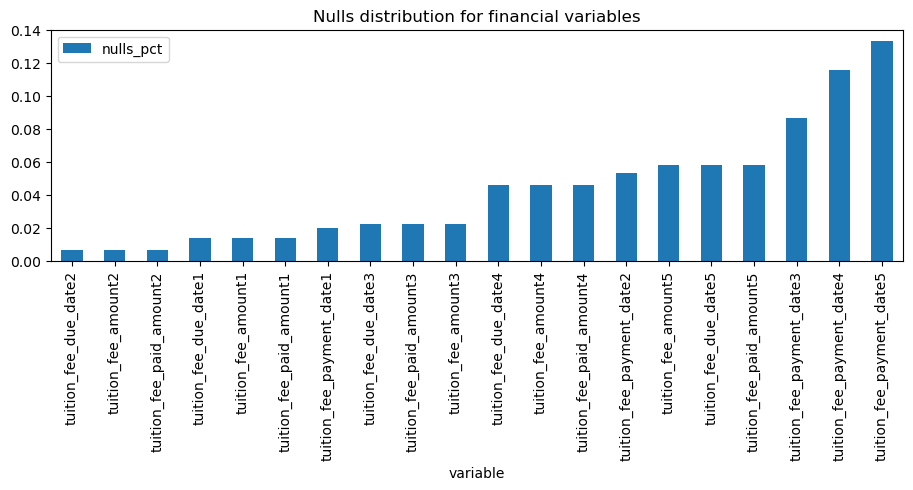

In [15]:
students_financial_variables = university_data[financial_null_cols]
nulls = (students_financial_variables.isnull().sum()/students_financial_variables.shape[0])
nulls = pd.DataFrame(nulls[nulls > 0 ].reset_index()).rename(columns = {"index": "variable",0:"nulls_pct"})
nulls.sort_values('nulls_pct').plot.bar(x='variable', y='nulls_pct', rot=90,figsize=(11, 3))
plt.title('Nulls distribution for financial variables')
plt.show()

From the chart, we can see that the financial variables of the same type show a stepped behavior regarding the presence of null values. For instance, looking at the payment date from left to right, we can observe that for tuition 1, there is less presence of null values compared to tuition 3, and so on until we reach tuition 5. This pattern suggests that a student may pay only up to a certain document and is highly likely not to pay the rest.

In [16]:
payment_date_cols = ['tuition_fee_due_date1', 'tuition_fee_due_date2','tuition_fee_due_date3', 'tuition_fee_due_date4',
    'tuition_fee_due_date5']
nulls[nulls.variable.isin(payment_date_cols)]

,variable,nulls_pct
0,tuition_fee_due_date1,0.013647
1,tuition_fee_due_date2,0.006197
2,tuition_fee_due_date3,0.022154
3,tuition_fee_due_date4,0.045982
4,tuition_fee_due_date5,0.057921


Dealing with missing values in financial variables is more complicated than in academic variables. Although we can easily assign 0 to some variables, like amounts, we cannot do the same with dates, or use the median, mode or mean. To handle these missing values, we will create new variables that can give us more insight into how students make their payments and help us develop a better strategy for dealing with null values.
  
Let's try to understand a little more about the behavior of these variables by examining some statistics.

In [17]:
university_data.groupby('period').tuition_fee_payment_date5.agg({pd.Series.mode,max,min})

,min,max,mode
period,,,
2015-1,2015-03-20 14:45:31,2017-12-17 12:30:33,2015-06-19 14:18:55
2015-2,2015-07-18 13:37:55,2018-01-08 10:47:29,2015-11-17 10:00:00
2016-1,2016-02-27 14:03:54,2018-02-12 14:01:44,2016-06-20 07:00:00
2016-2,2016-07-05 11:31:56,2018-02-12 13:03:50,2016-11-19 08:00:00
2017-1,2017-03-19 16:04:31,2018-02-12 19:56:27,2017-06-18 18:00:00


In the case of the maximum payment dates, we see dates that exceed the respective period year by up to 2 years. This indicates that these variables can be updated even much later, depending on when the student paid the corresponding tuition fee. This behavior in the update of the payment date can impact the analysis of the payment behavior of the students, as it can cause the payment to be attributed to a different period, leading to incorrect conclusions. 

Taking this behavior into consideration, we will make some adjustments to the information to conduct a proper analysis.

#### - Creating new variables

To get a better understanding of the financial situation of the students at the end of the period, we will create new variables called "paymentX". This variable will evaluate the payment date of all tuitions fee with the end date of the corresponding period. By doing so, we will have a more accurate representation of whether or not the student has paid their tuition fee on time.

If the payment date is null, it means that the student has not made the payment, and therefore the new variable would have a value of 0.

In [18]:
university_data['payment1'] = 0
university_data['payment2'] = 0
university_data['payment3'] = 0
university_data['payment4'] = 0
university_data['payment5'] = 0
university_data.loc[(university_data['tuition_fee_due_date1'] <= university_data['period_end_date']) &
                     (university_data['tuition_fee_due_date1'].notnull()),'payment1'] = 1
university_data.loc[(university_data['tuition_fee_due_date2'] <= university_data['period_end_date']) &
                     (university_data['tuition_fee_due_date2'].notnull()),'payment2'] = 1
university_data.loc[(university_data['tuition_fee_due_date3'] <= university_data['period_end_date']) &
                     (university_data['tuition_fee_due_date3'].notnull()),'payment3'] = 1
university_data.loc[(university_data['tuition_fee_due_date4'] <= university_data['period_end_date']) &
                     (university_data['tuition_fee_due_date4'].notnull()),'payment4'] = 1
university_data.loc[(university_data['tuition_fee_due_date5'] <= university_data['period_end_date']) &
                     (university_data['tuition_fee_due_date5'].notnull()),'payment5'] = 1

And now we can also create new variables "full_paymentX" to determine if the student has made the complete payment of the corresponding installment, by comparing the amount to be paid with the amount paid.

In [19]:
university_data['full_payment1'] = 0
university_data['full_payment2'] = 0
university_data['full_payment3'] = 0
university_data['full_payment4'] = 0
university_data['full_payment5'] = 0
university_data.loc[(university_data['tuition_fee_amount1'] <= university_data['tuition_fee_paid_amount1']
                     ) &  (university_data.payment1 == 1),'full_payment1'] = 1
university_data.loc[(university_data['tuition_fee_amount2'] <= university_data['tuition_fee_paid_amount2']
                     ) &  (university_data.payment2 == 1),'full_payment2'] = 1
university_data.loc[(university_data['tuition_fee_amount3'] <= university_data['tuition_fee_paid_amount3']
                     ) &  (university_data.payment3 == 1),'full_payment3'] = 1
university_data.loc[(university_data['tuition_fee_amount4'] <= university_data['tuition_fee_paid_amount4']
                     ) &  (university_data.payment4 == 1),'full_payment4'] = 1
university_data.loc[(university_data['tuition_fee_amount5'] <= university_data['tuition_fee_paid_amount5']
                     ) &  (university_data.payment5 == 1),'full_payment5'] = 1

Let's examine some statistics for the new variables without null values.

In [20]:
new_financial_variables = ['payment1','payment2','payment3','payment4','payment5','full_payment1','full_payment2',
    'full_payment3','full_payment4','full_payment5']
university_data[new_financial_variables].mean()

payment1         0.983767
payment2         0.991282
payment3         0.793461
payment4         0.773845
payment5         0.563029
full_payment1    0.964167
full_payment2    0.955059
full_payment3    0.757385
full_payment4    0.729766
full_payment5    0.524024
dtype: float64

In [21]:
university_data[university_data.dropout_flag == 0][new_financial_variables].mean()

payment1         0.990024
payment2         0.995066
payment3         0.806376
payment4         0.794641
payment5         0.572633
full_payment1    0.975113
full_payment2    0.993843
full_payment3    0.805625
full_payment4    0.793825
full_payment5    0.571818
dtype: float64

According to the values, there is a decreasing trend in the proportion of payment made by the student as the tuition fee number increases. For example, for the first tuition fee, the payment proportion is 0.983767, while for the fifth, it drops to 0.563029.

Similarly, the values for "full_paymentX" also decrease as the tuition fee number increases, indicating that fewer students have made the complete payment of the installment as the academic term progresses. For instance, for the first tuition fee, the proportion of students who made full payment is 0.964167, whereas for the fifth, it drops to 0.524024.

### HANDLE CATEGORICAL VARIABLES

In [22]:
print("The available categorical variables are: ")
university_data.select_dtypes(include=['object']).columns.tolist()

The available categorical variables are: 


['student_id', 'period', 'student_type', 'status', 'next_term_date']

**student type** is the only categorical variable of interest in our dataset.

In [23]:
university_data_cat = pd.get_dummies(university_data,dummy_na = False,columns = ['student_type'], drop_first=True)

In [24]:
print("A preview of our final dataset is: ")
university_data_cat.head()

A preview of our final dataset is: 


,student_id,period,enrolled_credits,enrolled_courses,enrollment_days,scholarship_percentage,cycle,previous_cycle_scholarship_percentage,previous_cycle_avg_grade,previous_cycle_student_admission,formal_withdrawal_previous_cycle,cumulative_avg_grade,cumulative_courses_failed,cumulative_enrolled_credits,cumulative_approved_credits,enrolled_academic_periods,total_withdrawals_period,total_dropouts,previous_cycle_failed_courses_ratio,works,withdrawn_courses,number_of_absences,number_of_scheduled_classes,attendance_percentage,formal_withdrawal,average_grade,failed_courses,approved_credits,dropout,status,dropout_flag,tuition_fee_due_date1,tuition_fee_due_date2,tuition_fee_due_date3,tuition_fee_due_date4,tuition_fee_due_date5,tuition_fee_amount1,tuition_fee_amount2,tuition_fee_amount3,tuition_fee_amount4,tuition_fee_amount5,tuition_fee_payment_date1,tuition_fee_payment_date2,tuition_fee_payment_date3,tuition_fee_payment_date4,tuition_fee_payment_date5,tuition_fee_paid_amount1,tuition_fee_paid_amount2,tuition_fee_paid_amount3,tuition_fee_paid_amount4,tuition_fee_paid_amount5,next_term_date,period_end_date,payment1,payment2,payment3,payment4,payment5,full_payment1,full_payment2,full_payment3,full_payment4,full_payment5,student_type_new,student_type_returning
0,CAAJBABBD,2015-1,18.0,3.0,4,20.00,10,0.00,16.41,0.0,0.0,15.67,0.0,44.0,44.0,3,0.0,0.0,0.00,0,0,1.0,27.0,0.96,0,16.33,0.0,18.0,0,PERMANENCIA,0,2015-02-20,2015-03-20,2015-04-20,2015-05-19,2015-06-20,1029.0,771.75,771.75,787.75,771.75,2015-02-24 17:23:52,2015-03-28 14:30:20,2015-05-04 14:03:26,2015-06-10 09:48:16,2015-07-12 18:36:30,1029.0,771.75,771.75,787.75,771.75,2017-08-07,2015-06-08,1,1,1,1,0,1,1,1,1,0,0,0
1,CAAJBADCH,2015-1,10.0,2.0,0,45.54,2,0.00,17.25,0.0,0.0,15.57,0.0,20.0,20.0,2,0.0,0.0,0.00,1,0,1.0,13.0,0.92,0,17.50,0.0,10.0,0,PERMANENCIA,0,2015-02-20,2015-03-20,2015-04-20,2015-05-19,2015-06-20,1029.0,443.24,443.24,459.24,443.24,2015-03-13 17:39:11,2015-03-31 11:42:20,2015-07-16 16:46:46,2015-07-16 16:47:44,2015-07-16 16:50:57,1029.0,443.24,443.24,459.24,443.24,2017-08-07,2015-06-08,1,1,1,1,0,1,1,1,1,0,0,0
2,CAAJBAGIC,2015-1,21.0,4.0,3,0.00,5,46.09,10.00,0.0,0.0,12.89,8.0,85.0,40.0,5,0.0,0.0,0.53,0,1,9.0,41.0,0.78,0,14.00,1.0,10.0,1,BAJA,1,2015-02-20,2015-03-20,2015-04-20,2015-05-19,2015-06-20,1029.0,1029.00,1029.00,1120.00,1029.00,2015-03-06 15:09:04,2015-04-03 20:21:59,2015-04-27 19:17:39,2015-06-08 14:36:56,2015-06-28 14:35:46,1029.0,1029.00,1029.00,1120.00,1029.00,2017-08-07,2015-06-08,1,1,1,1,0,1,1,1,1,0,0,0
3,CAAJBAJHA,2015-1,24.0,5.0,4,0.00,6,0.00,0.00,0.0,0.0,13.92,4.0,23.0,5.0,2,0.0,1.0,0.80,1,5,27.0,33.0,0.18,1,0.00,0.0,0.0,0,PERMANENCIA,0,2015-03-08,2015-03-20,2015-04-20,2015-05-19,2015-06-20,1029.0,1029.00,1319.00,1335.00,1319.00,2015-03-07 14:39:48,2015-04-26 20:01:48,2015-04-26 20:08:28,2015-06-27 10:44:59,2015-06-27 10:46:17,1029.0,1029.00,1319.00,1335.00,1319.00,2017-08-07,2015-06-08,1,1,1,1,0,1,1,1,1,0,0,1
4,CAAJBBCHG,2015-1,13.0,3.0,3,20.00,2,0.00,19.00,0.0,0.0,15.10,0.0,41.0,41.0,3,0.0,0.0,0.00,0,0,2.0,33.0,0.94,0,17.46,0.0,13.0,0,RESERVA,1,2015-02-20,2015-03-20,2015-04-20,2015-05-19,2015-06-20,1029.0,771.75,771.75,787.75,771.75,2015-02-18 10:46:32,2015-03-18 10:33:29,2015-04-19 10:44:12,2015-05-16 18:51:41,2015-06-19 09:42:35,1029.0,771.75,771.75,787.75,771.75,2017-08-07,2015-06-08,1,1,1,1,0,1,1,1,1,0,0,0


After cleaning and processing the dataset, we now have a complete and clean dataset that can be used to answer some business questions. Additionally, we can use this dataset to model a machine learning algorithm to predict and prevent student dropout. 

##  BUSINESS QUESTIONS

## 1- Is there a significant difference in dropout rates over time and between different types  of students?

Firstly, we need to analyze the dropout rate over time. We got historical information of students who dropped out during each semester from 2015-1 to 2017-1. 

In [25]:
university_data.groupby('period').dropout_flag.mean()

period
2015-1    0.198450
2015-2    0.241671
2016-1    0.236767
2016-2    0.266611
2017-1    0.270449
Name: dropout_flag, dtype: float64

The percentages seem to show an increasing trend, with a dropout rate of 19.84% in 2015-1, increasing to 27.04% in 2017-1.

Now, let's examine the dropout rates based on student types. For our analysis, we are only considering "new", "continuing" and "returning" students.

In [26]:
university_data.groupby(['student_type']).dropout_flag.mean()

student_type
continuing    0.180009
new           0.398097
returning     0.400057
Name: dropout_flag, dtype: float64

The results suggest that both new and returning students are more prone to dropout compared to continuing students.

Let's include the type of student in the analysis of historical dropout.

In [27]:
university_data['student type'] = university_data['student_type']
university_data['student type'] = university_data['student type'].replace({'continuing':'C','returning':'R','new':'N'})
university_data.groupby(['period','student_type']).dropout_flag.mean()

period  student_type
2015-1  continuing      0.148269
        new             0.349729
        returning       0.275621
2015-2  continuing      0.176895
        new             0.444503
        returning       0.430913
2016-1  continuing      0.181662
        new             0.356694
        returning       0.395365
2016-2  continuing      0.186152
        new             0.469984
        returning       0.481406
2017-1  continuing      0.212503
        new             0.389194
        returning       0.405089
Name: dropout_flag, dtype: float64

After including student type, we can see that new and returning students consistently have the highest dropout rates compared to continuing students historically.
This provides support for the notion that at the university level, retaining the population of new students is a significant concern.

Moreover, the data suggests a noticeable rise in dropout rates across the observed periods. This indicates a growing challenge in retaining students and highlights the need for further analysis and targeted interventions to address the underlying factors contributing to this trend.

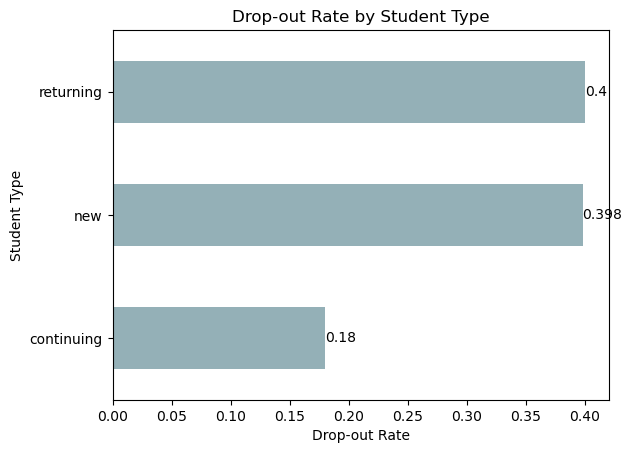

In [28]:
ax = university_data.groupby(['student_type']).dropout_flag.mean().round(3).plot.barh(color = ['#94b0b7']) #'#003297'
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Student Type')
plt.xlabel('Drop-out Rate')
plt.title('Drop-out Rate by Student Type')
plt.show()

There is a noticeable rise in the dropout rate over time, particularly during the even semesters of the year. This trend is consistent across different types of students.

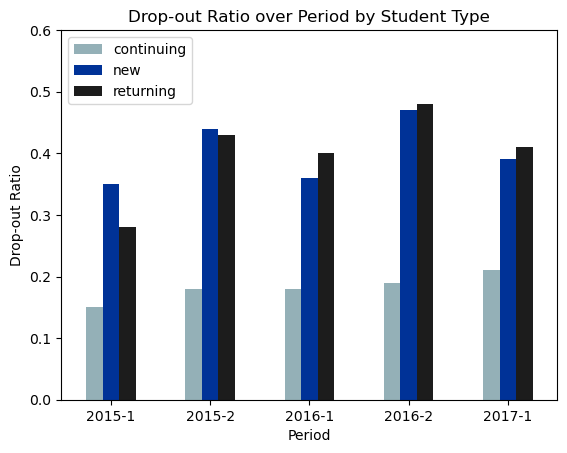

In [29]:
a = university_data[university_data.student_type == 'continuing'].groupby(['period']).dropout_flag.mean().round(2)
b = university_data[university_data.student_type == 'new'].groupby(['period']).dropout_flag.mean().round(2)
c = university_data[university_data.student_type == 'returning'].groupby(['period']).dropout_flag.mean().round(2)

index = sorted(university_data.period.unique())
df = pd.DataFrame({'continuing': a,'new': b,'returning': c}, index=index)
ax = df.plot.bar(rot=0, color = ['#94b0b7','#003297','#1c1c1c'])
ax.set_ylim([0, 0.6])
#for container in ax.containers:
#    ax.bar_label(container)
plt.xlabel('Period')
plt.ylabel('Drop-out Ratio')
plt.title('Drop-out Ratio over Period by Student Type')
plt.show()

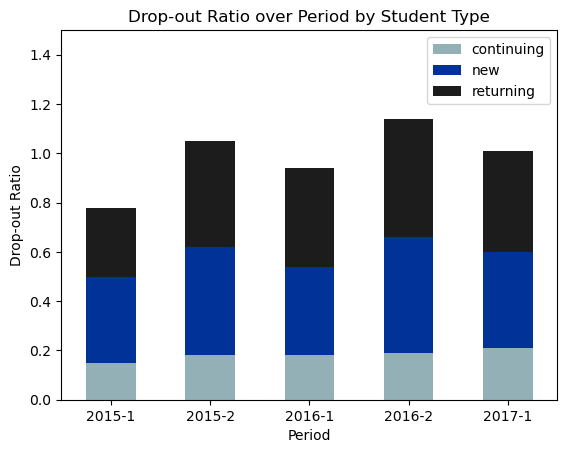

In [30]:
ax = df.plot.bar(rot=0,stacked = True, color = ['#94b0b7','#003297','#1c1c1c'])
ax.set_ylim([0, 1.5])
plt.xlabel('Period')
plt.ylabel('Drop-out Ratio')
plt.title('Drop-out Ratio over Period by Student Type')
plt.show()

There is a noticeable rise in the dropout rate over time, particularly during the even semesters of the year. This trend is consistent across different types of students.

## 2- Are there any variables that significantly differ in distribution among student types?

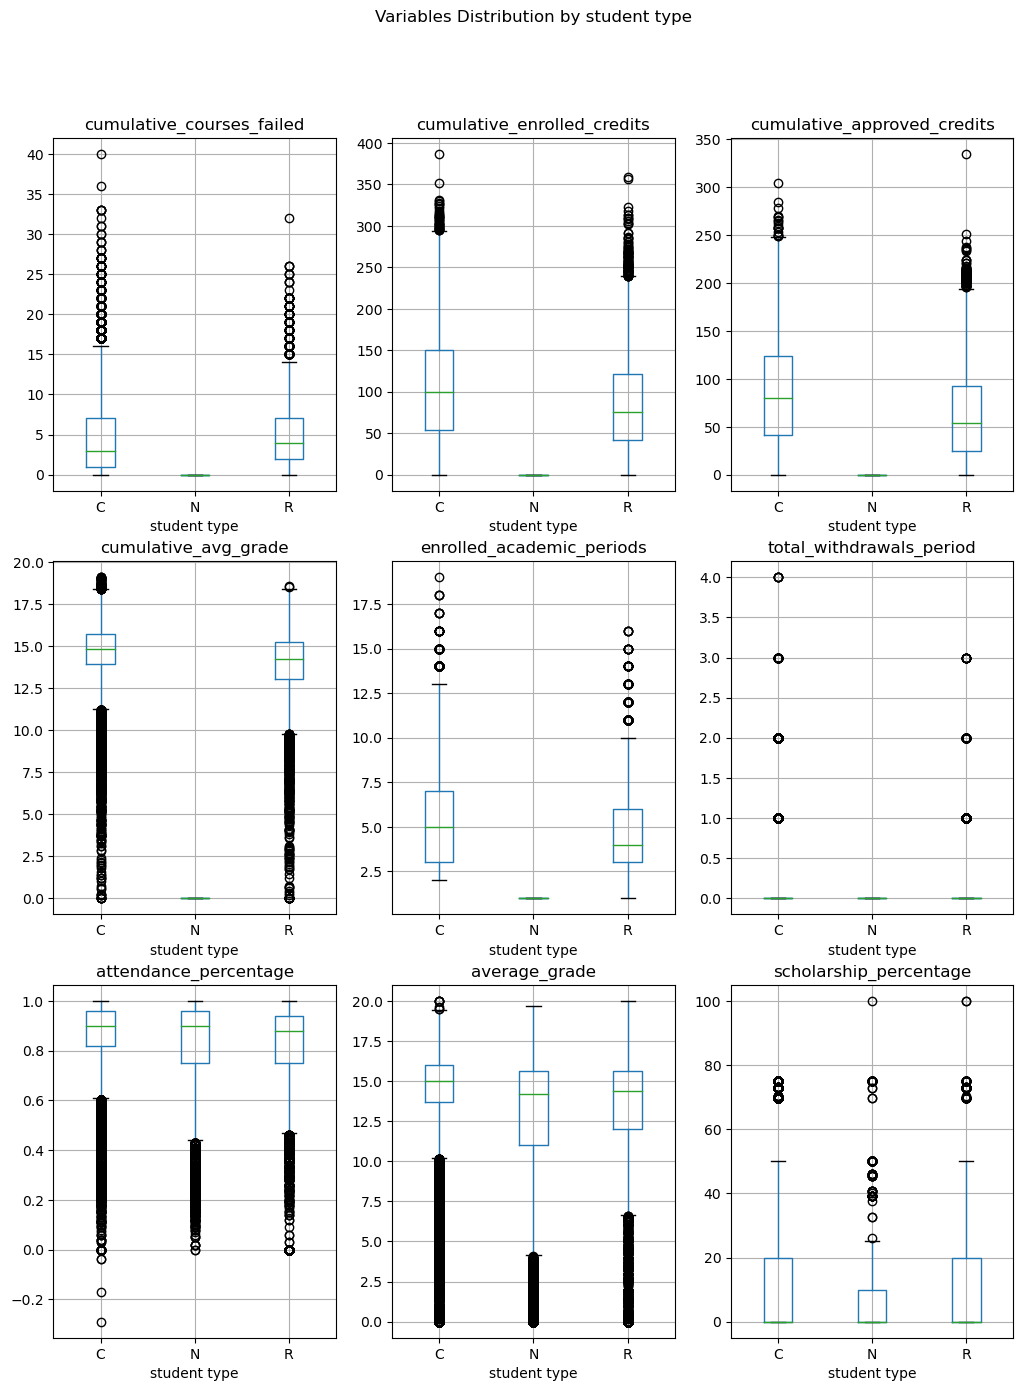

In [31]:
fig, axes = plt.subplots(3,3,figsize=(12, 16))

for i,el in enumerate(['cumulative_courses_failed','cumulative_enrolled_credits','cumulative_approved_credits',
                    'cumulative_avg_grade','enrolled_academic_periods','total_withdrawals_period',
                    'attendance_percentage','average_grade','scholarship_percentage']):
    a = university_data.boxplot(el, by="student type", ax=axes.flatten()[i])
fig.suptitle('Variables Distribution by student type')
plt.show()

The behavior of most variables is similar across different types of students, with a slightly higher distribution among continuing students (C). However, for certain variables, there is incomplete information specifically for the population of new students, this missing data is primarily related to historical information.

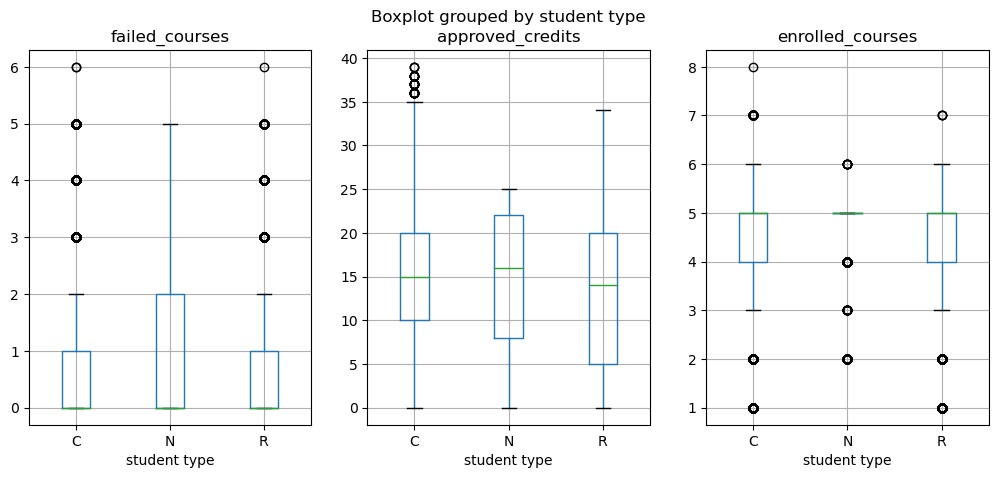

In [32]:
fig, axes = plt.subplots(1,3,figsize=(12, 5))
for i,el in enumerate(['failed_courses','approved_credits','enrolled_courses']):
    a = university_data.boxplot(el, by="student type", ax=axes.flatten()[i])

The distribution of the continuing and returning student population is the most similar when compared to the new student population. Let's explore some examples where this similarity is evident. For instance, the number of courses enrolled, where new students have a limit on the number of courses they can take, and thus are limited in the number of courses and credits they can pass. On the other hand, returning and regular students have more flexibility in the number of courses they can take, which may lead to a higher course completion rate and some academic variables.

## 3- Is the financial situation of students correlated with their academic performance and dropout rate?

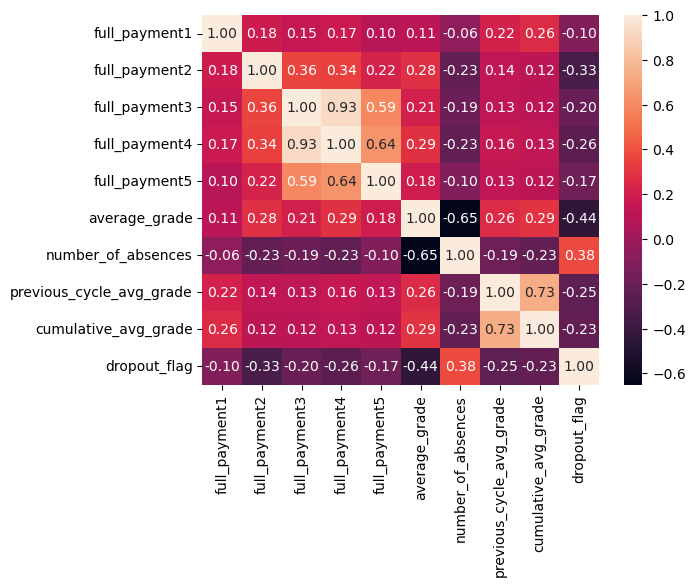

In [33]:
df_corr = university_data[['full_payment1','full_payment2','full_payment3','full_payment4','full_payment5',
                            'average_grade','number_of_absences','previous_cycle_avg_grade','cumulative_avg_grade',
                            'dropout_flag']]
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f");

From the heatmap chart (correlation matrix), we can see that there are some interesting relationships between financial and academic variables.

Firstly, there is a positive correlation between full payments and average grades, which suggests that students who make their payments on time tend to have higher grades.

Secondly, there is a negative correlation between the number of absences and average grades, which indicates that students who miss more classes tend to have lower grades.

Thirdly, there is a negative correlation between the dropout flag and both full payments and average grades, which implies that students who fail to make their payments or have lower grades are more likely to drop out.

Overall, these correlations suggest that there is a relationship between financial, academic performance and dropout, and that addressing financial issues may help improve academic outcomes and overall retention.

## 4 - How do students who drop out differ academically from those who do not?

To understand the extent of differences in the academic behavior between dropout students and their non-dropout counterparts, let us begin by considering some factors that play a crucial role in assessing a student's academic performance.

In [34]:
university_data['student_status'] = [ 'dropout' if i == 1 else 'non-dropout' for i in university_data.dropout_flag]

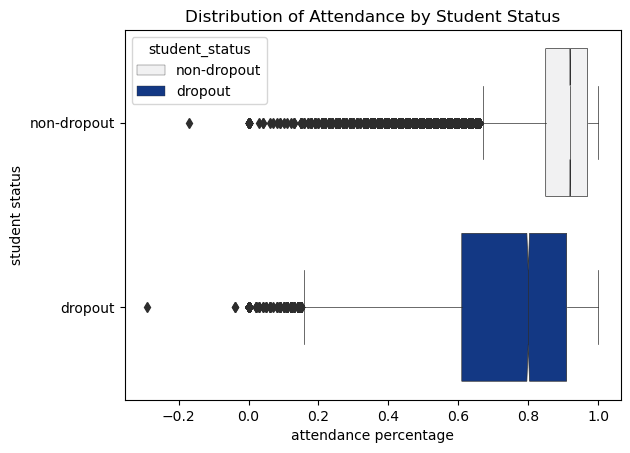

In [35]:
sns.boxplot(data=university_data, x="attendance_percentage", y="student_status", hue="student_status", dodge=False,
           color ='#003297',linewidth = .5, showcaps=True, notch=True)
plt.xlabel('attendance percentage')
plt.ylabel('student status')
plt.title('Distribution of Attendance by Student Status')
plt.show()

Attendance, ah, the never-ending game of hide and seek played by students. It's no secret that dropout students often struggle with maintaining regular attendance, revealing their lower commitment and engagement with their studies. While attendance may be seen as a mere requirement, it holds deeper significance as a reflection of a student's dedication to their education. The chart above provides tangible evidence of the impact attendance has on student success. Non-dropout students, boasting higher attendance percentages, showcase a stronger dedication to their studies.

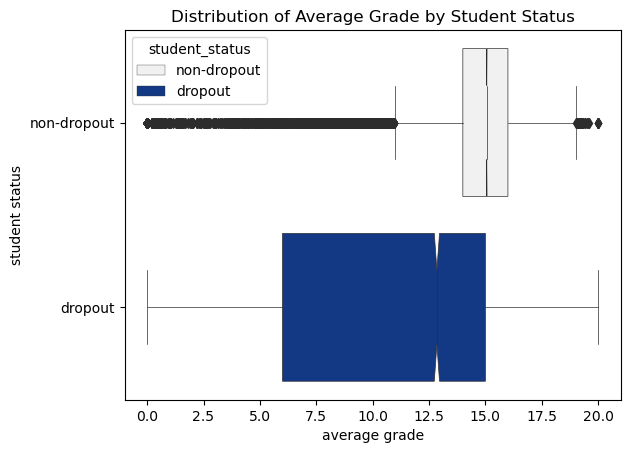

In [36]:
sns.boxplot(data=university_data, x="average_grade", y="student_status", hue="student_status", dodge=False,
           color ='#003297',linewidth = .5, showcaps=True, notch=True)
plt.xlabel('average grade')
plt.ylabel('student status')
plt.title('Distribution of Average Grade by Student Status')
plt.show()

## 4 - What is the financial behavior of students who end up dropping out?

As the familiar question goes, "Why did the student drop out of college? He couldn't afford the tuition. The financial behavior of students who end up  dropping out is heavily influenced by their inability to afford tuition fees.

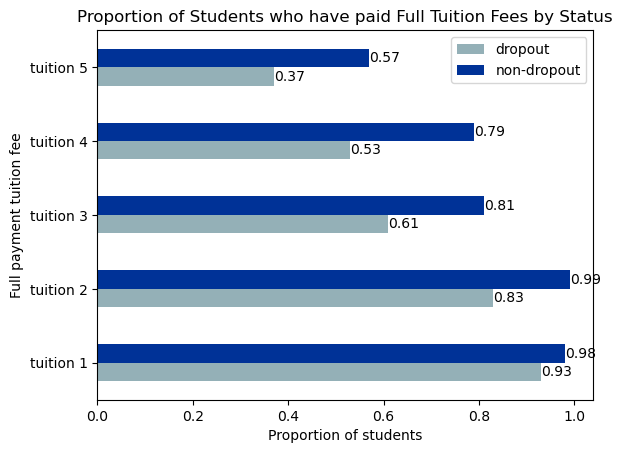

In [37]:
rename_tuition = {'full_payment1':'tuition 1','full_payment2':'tuition 2','full_payment3':'tuition 3',
          'full_payment4':'tuition 4','full_payment5':'tuition 5'}
a = university_data[university_data.dropout_flag == 1][['full_payment1',
 'full_payment2','full_payment3','full_payment4','full_payment5']].rename(columns = rename_tuition).mean().round(2)
b = university_data[university_data.dropout_flag == 0][['full_payment1',
 'full_payment2','full_payment3','full_payment4','full_payment5']].rename(columns = rename_tuition).mean().round(2)#.plot.bar()
#index = ['full_payment1','full_payment2','full_payment3','full_payment4','full_payment5']
index = ['tuition 1','tuition 2','tuition 3','tuition 4','tuition 5']
df = pd.DataFrame({'dropout': a,
                   'non-dropout': b}, index=index)
ax = df.plot.barh(rot=0, color = ['#94b0b7','#003297'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Proportion of students')
plt.ylabel('Full payment tuition fee')
plt.title('Proportion of Students who have paid Full Tuition Fees by Status')
plt.show()

The graph reveals a significant difference in payment behavior between  students who continue their studies and those who drop out. Non-dropout students show a higher proportion of payment, indicating their ability to meet the financial demands of education. On the other hand, students who cannot afford the costs of tuition face a significant barrier that hinders their ability to continue their studies.

### Conclusions

Let's recap.

- There is a growing trend in student dropout, especially during the even semesters of the year.
- It is crucial to pay closer attention to the population of new and returning students as they are more susceptible to dropping out of their studies.
- Academically, dropout students display lower performance and engagement.
- Dropout students show financial difficulties, particularly the inability to afford tuition fees

## Next Steps

Now that we have completed the data preparation, we can move on to the next step of the process, which involves creating a predictive classification model. This model will allow us to use the data we have collected to make predictions about future events, which can be useful for making informed decisions. The model building process may involve selecting a suitable algorithm, identifying relevant variables, and evaluating the performance of the model.